<a href="https://colab.research.google.com/github/najiyak23/Funnel-Analysis-Understanding-User-Drop-Offs/blob/main/Funnel_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amirmotefaker/user-funnels-dataset")

print("Path to dataset files:", path)


100%|██████████| 45.8k/45.8k [00:00<00:00, 36.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/amirmotefaker/user-funnels-dataset/versions/1


In [2]:
import os
print(os.listdir(path))

['user_data.csv']


In [4]:
import pandas as pd

In [6]:
# Load the dataset into a DataFrame
df = pd.read_csv(path + "/user_data.csv")
df.head()

,user_id,stage,conversion
0,user_0,homepage,True
1,user_1,homepage,True
2,user_2,homepage,True
3,user_3,homepage,True
4,user_4,homepage,True


In [7]:
print(df.shape)

(17175, 3)


In [8]:
df['stage'].unique()


array(['homepage', 'product_page', 'cart', 'checkout', 'purchase'],
      dtype=object)

In [11]:
funnel_counts = (
    df[df['conversion'] == True]              # 1. Keep only rows where conversion = True
    .groupby('stage')['user_id']              # 2. Group data by each funnel stage
    .nunique()                                # 3. Count unique users in each stage
    .reset_index(name='users')                # 4. Turn result into a DataFrame with a column called "users"
)


In [13]:
funnel_counts

,stage,users
2,homepage,10000
3,product_page,2515
0,cart,449
1,checkout,36
4,purchase,14


In [12]:
# Ensure correct funnel order
stage_order = ['homepage', 'product_page', 'cart', 'checkout', 'purchase']
funnel_counts['stage'] = pd.Categorical(funnel_counts['stage'], categories=stage_order, ordered=True)
funnel_counts = funnel_counts.sort_values('stage')

In [14]:
# Conversion rate from homepage
funnel_counts['conversion_rate'] = (funnel_counts['users'] / funnel_counts['users'].iloc[0] * 100).round(2)

funnel_counts

,stage,users,conversion_rate
2,homepage,10000,100.00
3,product_page,2515,25.15
0,cart,449,4.49
1,checkout,36,0.36
4,purchase,14,0.14


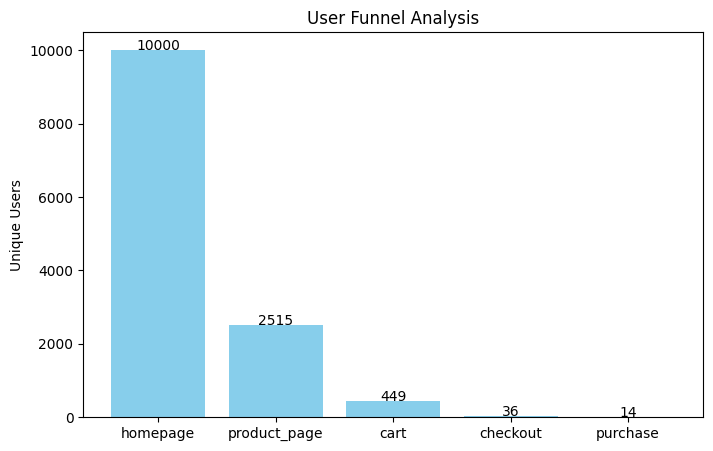

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(funnel_counts['stage'], funnel_counts['users'], color='skyblue')
for i, v in enumerate(funnel_counts['users']):
    plt.text(i, v + 5, str(v), ha='center')
plt.title("User Funnel Analysis")
plt.ylabel("Unique Users")
plt.show()


In [16]:
import plotly.express as px
fig = px.funnel(funnel_counts, x='users', y='stage', title="User Funnel")
fig.show()
